
# 引入pandas库并测试版本
---



In [ ]:
import pandas as pd
pd.__version__

'1.1.5'

**读入数据信息**

---

使用iloc选择所需要的列，使用dropna删除含有空值的行

In [ ]:
SH_Frame = pd.read_csv('./drive/MyDrive/600009.SH.CSV',encoding='gb2312')
SH_Frame = SH_Frame.iloc[:,[0,1,2,4,7,9]].dropna()
SH_Frame['日期索引'] =  pd.to_datetime(SH_Frame['日期']) #新增日期索引列
SH_Frame.set_index('日期索引',inplace = True) #将日期索引列作为目录
SH_Frame

,代码,简称,日期,开盘价(元),收盘价(元),成交金额(元)
日期索引,,,,,,
1998-02-18,600009.SH,上海机场,1998-02-18,3.4390,3.1123,1.267013e+09
1998-02-19,600009.SH,上海机场,1998-02-19,3.0917,3.0263,2.721070e+08
1998-02-20,600009.SH,上海机场,1998-02-20,3.0263,3.0538,1.380111e+08
1998-02-23,600009.SH,上海机场,1998-02-23,3.0401,3.1398,1.616534e+08
1998-02-24,600009.SH,上海机场,1998-02-24,3.1536,3.0573,1.029877e+08
...,...,...,...,...,...,...
2016-06-02,600009.SH,上海机场,2016-06-02,27.6500,27.5800,7.271235e+07
2016-06-03,600009.SH,上海机场,2016-06-03,27.5600,27.7900,1.201543e+08
2016-06-06,600009.SH,上海机场,2016-06-06,27.7900,27.7600,1.082610e+08


**对数据进行汇总**

---

获得每个月（按自然月）的平均开盘价（元）和平均收盘价（元），总成交金额（元）。

此时获得数据：代码、简称，月份，平均开盘价，平均收盘价，总成交金额。

In [ ]:
ticks = SH_Frame.iloc[:]
sums = ticks.resample('M').sum()
sums.rename(columns={"开盘价(元)":"总开盘价(元)", "收盘价(元)":"总收盘价(元)", "成交金额(元)":"总成交金额(元)"},inplace=True)
means = ticks.resample('M').mean()
means.rename(columns={"开盘价(元)":"平均开盘价(元)", "收盘价(元)":"平均收盘价(元)", "成交金额(元)":"平均成交金额(元)"},inplace=True)
print(means.head())
print(sums.head())

            平均开盘价(元)  平均收盘价(元)     平均成交金额(元)
日期索引                                        
1998-02-28  3.126062  3.081350  2.644211e+08
1998-03-31  3.319895  3.331632  1.113967e+08
1998-04-30  3.429950  3.426977  7.394176e+07
1998-05-31  3.337050  3.330525  2.972156e+07
1998-06-30  3.287232  3.278009  3.577311e+07
            总开盘价(元)  总收盘价(元)      总成交金额(元)
日期索引                                      
1998-02-28  25.0085  24.6508  2.115369e+09
1998-03-31  73.0377  73.2959  2.450726e+09
1998-04-30  75.4589  75.3935  1.626719e+09
1998-05-31  66.7410  66.6105  5.944312e+08
1998-06-30  72.3191  72.1162  7.870084e+08


Text(0, 0.5, '金额')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_

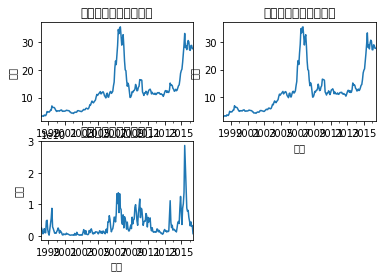

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
means.iloc[:,0].plot(title='平均开盘价随时间变化')
plt.xlabel('日期')
plt.ylabel('股价')
plt.subplot(2,2,2)
means.iloc[:,1].plot(title='平均收盘价随时间变化')
plt.xlabel('日期')
plt.ylabel('股价')
plt.subplot(2,2,3)
sums.iloc[:,2].plot(title='总成交金额随时间变化')
plt.xlabel('日期')
plt.ylabel('金额')

**回归分析：**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
from sklearn.preprocessing import MinMaxScaler
data2_frame = pd.read_csv('./drive/MyDrive/data2.csv',encoding='gb2312',header=None,names=
    ['销售日期','销售价格','卧室数','浴室数','房屋面积','停车面积','楼层数','房屋评分','建筑面积','地下室面积','建筑年份','修复年份','纬度','经度']
)
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

#print(x)
#data2_frame.head()

#sns.set(style='whitegrid', context='notebook')
#sns.pairplot(data2_frame, size=2)
#plt.savefig('x.png')
#corr = data2_frame.corr()
#sns.heatmap(corr, cmap='GnBu_r', square=True, annot=False)
#plt.savefig('xx.png')

data2_frame.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


,销售日期,销售价格,卧室数,浴室数,房屋面积,停车面积,楼层数,房屋评分,建筑面积,地下室面积,建筑年份,修复年份,纬度,经度
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


In [ ]:
#数据处理
x = []
for i in range(14):
  if i != 1:
    x.append(data2_frame.iloc[:,i].values.reshape((-1,1)))
  else:
    y = data2_frame.iloc[:,i].values.reshape((-1,1))
X = data2_frame.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]].values
train_names = ['date', 'price', 'bedroom_num', 'bathroom_num', 'house_area',
        'park_space', 'floor_num', 'house_score', 'covered_area', 'basement_area',
        'yearbuilt', 'yearremodadd', 'lat', 'long', 'sell_year', 'sell_month', 'sell_day',
        'house_old', 'fix_old']
sell_year, sell_month, sell_day = [], [], []
house_old, fix_old = [], []
for [date, yearbuilt, yearremodadd] in data2_frame.iloc[:,[0,10,11]].values:
  year,month,day = date//100000, date%10000//100, date%100
  sell_year.append(year)
  sell_month.append(month)
  sell_day.append(day)
  house_old.append(year-yearbuilt)
  if yearremodadd == 0:
    fix_old.append(0)
  else:
    fix_old.append(year-yearremodadd)
data2_frame['sell_year'] = pd.DataFrame({'sell_year':sell_year})
data2_frame['sell_month'] = pd.DataFrame({'sell_month':sell_month})
data2_frame['sell_day'] = pd.DataFrame({'sell_day':sell_day})
data2_frame['house_old'] = pd.DataFrame({'house_old':house_old})
data2_frame['fix_old'] = pd.DataFrame({'fix_old':fix_old})
data2_frame = data2_frame.astype('float')
#data2_frame.columns = train_names;
#del data2_frame['date']
x1 = data2_frame.drop('price',axis=1)
y1 = data2_frame.loc[:,'price']
X1 = MinMaxScaler().fit_transform(x1)
X1 = pd.DataFrame(X1, columns=x1.columns)

[Errno 99] Cannot assign requested address


In [ ]:
#参数

#交叉验证次数
n_folds = 5
#贝叶斯岭回归模型
br_model = BayesianRidge()
#线性回归模型
lr_model = LinearRegression()
#弹性网络回归模型
etc_model = ElasticNet()
#支持向量机回归模型
svr_model = SVR()
#梯度增强回归模型
gbr_model = GradientBoostingRegressor()

model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
#交叉验证结果
cv_score_list = []
#各个回归模型的y值列表
pre_y_list = []

#参数

In [ ]:
#读出每个回归模型对象
for model in model_dic:
  #将每个回归模型导入交叉检验
  scores = cross_val_score(model, X1, y1, cv=n_folds)
  #将交叉检验结果存入结果列表
  cv_score_list.append(scores)
  #将回归训练中得到的预测y存入列表
  pre_y_list.append(model.fit(X1, np.ravel(y1)).predict(X1))

[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


In [ ]:
###模型效果指标评估###
n_sample, n_feature = X1.shape
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
model_metrics_list = []
for pre_y in pre_y_list:
  tmp_list = []
  for mdl in model_metrics_name:
    #计算每个回归指标结果
    tmp_score = mdl(y1, pre_y)
    tmp_list.append(tmp_score)
  model_metrics_list.append(tmp_list)
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])

df_score.head()

,0,1,2,3,4
BayesianRidge,0.993329,0.994128,0.993182,0.994917,0.995203
LinearRegression,0.993326,0.994128,0.993182,0.994917,0.995204
ElasticNet,0.123238,0.119015,0.127370,0.113511,0.101165
SVR,-0.056203,-0.062298,-0.065727,-0.063556,-0.055856
GBR,0.993788,0.994661,0.993319,0.994487,0.987929


[Errno 99] Cannot assign requested address


In [ ]:
df_met.head()

,ev,mae,mse,r2
BayesianRidge,0.994289,24406.700715,7.941547e+08,0.994289
LinearRegression,0.994289,24408.372400,7.942092e+08,0.994289
ElasticNet,0.116303,218686.122522,1.228866e+11,0.116303
SVR,0.000987,223843.859109,1.474437e+11,-0.060291
GBR,0.995186,22130.634728,6.694002e+08,0.995186


[Errno 99] Cannot assign requested address


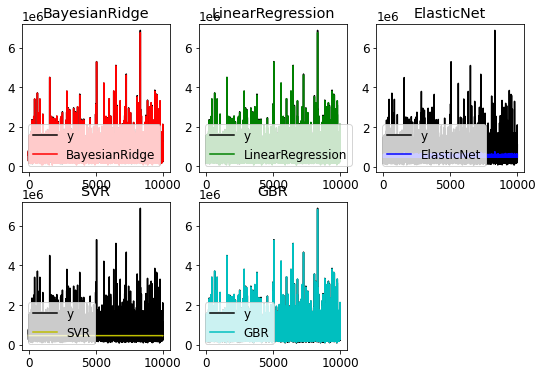

In [ ]:
plt.figure(figsize=(9, 6))
color_list = ['r', 'g', 'b', 'y', 'c']
for i, pre_y in enumerate(pre_y_list):
  plt.subplot(2, 3, i+1)
  plt.plot(np.arange(X1.shape[0]), y1, color='k', label='y')
  plt.plot(np.arange(X1.shape[0]), pre_y, color_list[i], label=model_names[i])
  plt.title(model_names[i])
  plt.legend(loc='lower left')
plt.savefig('xxx.png')
plt.show()

**鸢尾花：**


---

决策树分类

In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
font = FontProperties(fname='./drive/MyDrive/msyh.ttc')

In [ ]:
#数据处理
iris_frame = pd.read_csv('./drive/MyDrive/iris.csv')
X = iris_frame.iloc[:,[0,1,2,3]].values
y = iris_frame.iloc[:,4].values
label_list = ['setosa', 'versicolor', 'virginica']
#print(y)
#print(X)
attributes = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,targetname
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


[Errno 99] Cannot assign requested address


In [ ]:
#构建决策边界
def plot_decision_regions(X, y, classifier=None):
  marker_list = ['o','x','s']
  color_list = ['r','b','g']
  cmap = ListedColormap(color_list[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
  x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
  t1 = np.linspace(x1_min, x1_max)
  t2 = np.linspace(x2_min, x2_max)

  x1, x2 = np.meshgrid(t1, t2)
  y_hat = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
  y_hat = y_hat.reshape(x1.shape)
  plt.contourf(x1, x2, y_hat, alpha=0.2, cmap=cmap)
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)

  for ind, clas in enumerate(np.unique(y)):
    plt.scatter(X[y == clas, 0], X[y == clas, 1], alpha=0.8, s=50,
          c=color_list[ind],marker=marker_list[ind],label=label_list[clas])

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#plot_decision_regions(X, y, classifier=tree)
#plt.xlabel('花瓣长度(cm)', fontproperties=font)
#plt.ylabel('花瓣宽度(cm)', fontproperties=font)
#plt.legend(prop=font)
#plt.show()
print("训练集的准确率：%.3f"%tree.score(X_train, y_train))
print("测试集的准确率：%.3f"%tree.score(X_test, y_test))
y_hat = tree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_hat)
print("模型正确率：%.3f"%accuracy)

训练集的准确率：0.990
测试集的准确率：0.933
模型正确率：0.933


In [ ]:
lr = LogisticRegression(penalty='l2', solver='newton-cg', multi_class='multinomial')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("训练集的准确率：%.3f"%lr.score(X_train, y_train))
print("测试集的准确率：%.3f"%lr.score(X_test, y_test))
y_hat = lr.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_hat)
print("模型正确率：%.3f"%accuracy)

训练集的准确率：0.962
测试集的准确率：0.956
模型正确率：0.956


**LeNet-5**

In [ ]:
import torch.nn as nn
from collections import OrderedDict

In [ ]:
class C1(nn.Module):
  def __init__(self):
    super(C1, self).__init__()
    self.c1 = nn.Sequential(OrderedDict([
      ('c1', nn.Conv2d(1, 6, kernel_size=(5, 5))),
      ('relu1', nn.ReLU()),
      ('s1', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
    ]))
  def forward(self, img):
    output = self.c1(img)
    return output

class C2(nn.Module):
  def __init__(self):
    super(C2, self).__init__()

    self.c2 = nn.Sequential(OrderedDict([
      ('c2', nn.Conv2d(6, 16, kernel_size=(5, 5))),
      ('relu2', nn.ReLU()),
      ('s2', nn.MaxPool2d(kernel_size=(2, 2), stride=2))
    ]))
  def forward(self, img):
    output = self.c2(img)
    return output

class C3(nn.Module):
  def __init__(self):
    super(C3, self).__init__()

    self.c3 = nn.Sequential(OrderedDict([
      ('c3', nn.Conv2d(16, 120, kernel_size=(5, 5))),
      ('relu3', nn.ReLU())
    ]))
  def forward(self, img):
    output = self.c3(img)
    return output

class F4(nn.Module):
  def __init__(self):
    super(F4, self).__init__()

    self.f4 = nn.Sequential(OrderedDict([
      ('f4', nn.Linear(120, 84)),
      ('relu4', nn.ReLU())
    ]))
  def forward(self, img):
    output = self.f4(img)
    return output

class F5(nn.Module):
  def __init__(self):
    super(F5, self).__init__()

    self.f5 = nn.Sequential(OrderedDict([
      ('f5', nn.Linear(84, 10)),
      ('sig5', nn.LogSoftmax(dim=-1))
    ]))
  def forward(self, img):
    output = self.f5(img)
    return output

class LeNet5(nn.Module):
  """
  Input - 1x32x32
  Output - 10
  """
  def __init__(self):
    super(LeNet5, self).__init__()

    self.c1 = C1()
    self.c2_1 = C2()
    self.c2_2 = C2()
    self.c3 = C3()
    self.f4 = F4()
    self.f5 = F5()

  def forward(self, img):
    output = self.c1(img)

    x = self.c2_1(output)
    output = self.c2_2(output)

    output += x

    output = self.c3(output)
    output = output.view(img.size(0), -1)
    output = self.f4(output)
    output = self.f5(output)
    return output


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets.mnist import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

[Errno 99] Cannot assign requested address


In [ ]:
data_train = MNIST('./data/mnist',
          download=True,
          transform=transforms.Compose([
            transforms.Resize((32,32)),
            transforms.ToTensor()
          ]))
data_test = MNIST('./data/mnist',
          train=False,
          download=True,
          transform=transforms.Compose([
              transforms.Resize((32, 32)),
              transforms.ToTensor()
          ]))
data_train_loader = DataLoader(data_train, batch_size=256, shuffle=True, num_workers=8)
data_test_loader = DataLoader(data_test, batch_size=1024, num_workers=8)

net = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=2e-3)

cur_batch_win = None
cur_batch_win_opts = {
    'title': 'Epoch Loss Trace',
    'xlabel': 'Batch Number',
    'ylabel': 'Loss',
    'width': 1200,
    'height': 600,
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def train(epoch):
  global cur_batch_win
  net.train()
  loss_list, batch_list = [], []
  for i, (images, labels) in enumerate(data_train_loader):
    optimizer.zero_grad()
    output = net(images)
    loss = criterion(output, labels)
    loss_list.append(loss.detach().cpu().item())
    batch_list.append(i+1)
    if i % 10 == 0:
      print('Train - Epoch %d, Batch: %d, Loss: %f' % (epoch, i, loss.detach().cpu().item()))

    if viz.check_connection():
      cur_batch_win = viz.line(torch.Tensor(loss_list), torch.Tensor(batch_list),
                    win=cur_batch_win, name='current_batch_loss',
                    update=(None if cur_batch_win is None else 'replace'),
                    opts=cur_batch_win_opts)
    loss.backward()
    optimizer.step()
def test():
  net.eval()
  total_correct = 0
  avg_loss = 0.0
  for i, (images, labels) in enumerate(data_test_loader):
    output = net(images)
    avg_loss += criterion(output, labels).sum()
    pred = output.detach().max(1)[1]
    total_correct += pred.eq(labels.view_as(pred)).sum()
  avg_loss /= len(data_test)
  print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss.detach().cpu().item(), float(total_correct) / len(data_test)))

In [ ]:
def train_and_test(epoch):
  train(epoch)
  test()
  dummy_input = torch.randn(1, 1, 32, 32, requires_grad=True)


for e in range(1, 16):
  train_and_test(e)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train - Epoch 1, Batch: 0, Loss: 0.009972
Train - Epoch 1, Batch: 10, Loss: 0.002405


[Errno 99] Cannot assign requested address


Train - Epoch 1, Batch: 20, Loss: 0.007458
Train - Epoch 1, Batch: 30, Loss: 0.020839
Train - Epoch 1, Batch: 40, Loss: 0.026445


[Errno 99] Cannot assign requested address


Train - Epoch 1, Batch: 50, Loss: 0.000600
Train - Epoch 1, Batch: 60, Loss: 0.027038
Train - Epoch 1, Batch: 70, Loss: 0.005884


[Errno 99] Cannot assign requested address


Train - Epoch 1, Batch: 80, Loss: 0.020523
Train - Epoch 1, Batch: 90, Loss: 0.001804
Train - Epoch 1, Batch: 100, Loss: 0.002717


[Errno 99] Cannot assign requested address


Train - Epoch 1, Batch: 110, Loss: 0.013873
Train - Epoch 1, Batch: 120, Loss: 0.003657
Train - Epoch 1, Batch: 130, Loss: 0.013489


[Errno 99] Cannot assign requested address


Train - Epoch 1, Batch: 140, Loss: 0.000770
Train - Epoch 1, Batch: 150, Loss: 0.007120
Train - Epoch 1, Batch: 160, Loss: 0.024868


[Errno 99] Cannot assign requested address


Train - Epoch 1, Batch: 170, Loss: 0.004094
Train - Epoch 1, Batch: 180, Loss: 0.011133
Train - Epoch 1, Batch: 190, Loss: 0.064468


[Errno 99] Cannot assign requested address


Train - Epoch 1, Batch: 200, Loss: 0.011335
Train - Epoch 1, Batch: 210, Loss: 0.002527
Train - Epoch 1, Batch: 220, Loss: 0.003776


[Errno 99] Cannot assign requested address


Train - Epoch 1, Batch: 230, Loss: 0.032822


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000031, Accuracy: 0.991200
Train - Epoch 2, Batch: 0, Loss: 0.003338
Train - Epoch 2, Batch: 10, Loss: 0.002997


[Errno 99] Cannot assign requested address


Train - Epoch 2, Batch: 20, Loss: 0.007024
Train - Epoch 2, Batch: 30, Loss: 0.003467
Train - Epoch 2, Batch: 40, Loss: 0.003833


[Errno 99] Cannot assign requested address


Train - Epoch 2, Batch: 50, Loss: 0.001856
Train - Epoch 2, Batch: 60, Loss: 0.004239
Train - Epoch 2, Batch: 70, Loss: 0.004524


[Errno 99] Cannot assign requested address


Train - Epoch 2, Batch: 80, Loss: 0.002680
Train - Epoch 2, Batch: 90, Loss: 0.011059
Train - Epoch 2, Batch: 100, Loss: 0.007102


[Errno 99] Cannot assign requested address


Train - Epoch 2, Batch: 110, Loss: 0.004481
Train - Epoch 2, Batch: 120, Loss: 0.029595
Train - Epoch 2, Batch: 130, Loss: 0.020003


[Errno 99] Cannot assign requested address


Train - Epoch 2, Batch: 140, Loss: 0.005814
Train - Epoch 2, Batch: 150, Loss: 0.040137
Train - Epoch 2, Batch: 160, Loss: 0.011405


[Errno 99] Cannot assign requested address


Train - Epoch 2, Batch: 170, Loss: 0.015683
Train - Epoch 2, Batch: 180, Loss: 0.015243
Train - Epoch 2, Batch: 190, Loss: 0.022378


[Errno 99] Cannot assign requested address


Train - Epoch 2, Batch: 200, Loss: 0.001476
Train - Epoch 2, Batch: 210, Loss: 0.002941
Train - Epoch 2, Batch: 220, Loss: 0.011000


[Errno 99] Cannot assign requested address


Train - Epoch 2, Batch: 230, Loss: 0.013775


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000030, Accuracy: 0.991500
Train - Epoch 3, Batch: 0, Loss: 0.004295
Train - Epoch 3, Batch: 10, Loss: 0.020674


[Errno 99] Cannot assign requested address


Train - Epoch 3, Batch: 20, Loss: 0.000580
Train - Epoch 3, Batch: 30, Loss: 0.062240
Train - Epoch 3, Batch: 40, Loss: 0.036234


[Errno 99] Cannot assign requested address


Train - Epoch 3, Batch: 50, Loss: 0.007859
Train - Epoch 3, Batch: 60, Loss: 0.009914
Train - Epoch 3, Batch: 70, Loss: 0.001779


[Errno 99] Cannot assign requested address


Train - Epoch 3, Batch: 80, Loss: 0.000441
Train - Epoch 3, Batch: 90, Loss: 0.004870
Train - Epoch 3, Batch: 100, Loss: 0.019802


[Errno 99] Cannot assign requested address


Train - Epoch 3, Batch: 110, Loss: 0.004914
Train - Epoch 3, Batch: 120, Loss: 0.007422
Train - Epoch 3, Batch: 130, Loss: 0.003649


[Errno 99] Cannot assign requested address


Train - Epoch 3, Batch: 140, Loss: 0.002042
Train - Epoch 3, Batch: 150, Loss: 0.000529
Train - Epoch 3, Batch: 160, Loss: 0.001170


[Errno 99] Cannot assign requested address


Train - Epoch 3, Batch: 170, Loss: 0.003261
Train - Epoch 3, Batch: 180, Loss: 0.025907
Train - Epoch 3, Batch: 190, Loss: 0.003761


[Errno 99] Cannot assign requested address


Train - Epoch 3, Batch: 200, Loss: 0.009021
Train - Epoch 3, Batch: 210, Loss: 0.021300
Train - Epoch 3, Batch: 220, Loss: 0.006747


[Errno 99] Cannot assign requested address


Train - Epoch 3, Batch: 230, Loss: 0.007965


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000034, Accuracy: 0.990800
Train - Epoch 4, Batch: 0, Loss: 0.008252


[Errno 99] Cannot assign requested address


Train - Epoch 4, Batch: 10, Loss: 0.000912
Train - Epoch 4, Batch: 20, Loss: 0.009487
Train - Epoch 4, Batch: 30, Loss: 0.001938


[Errno 99] Cannot assign requested address


Train - Epoch 4, Batch: 40, Loss: 0.014926
Train - Epoch 4, Batch: 50, Loss: 0.043609
Train - Epoch 4, Batch: 60, Loss: 0.005725


[Errno 99] Cannot assign requested address


Train - Epoch 4, Batch: 70, Loss: 0.045377
Train - Epoch 4, Batch: 80, Loss: 0.024350
Train - Epoch 4, Batch: 90, Loss: 0.055101


[Errno 99] Cannot assign requested address


Train - Epoch 4, Batch: 100, Loss: 0.024274
Train - Epoch 4, Batch: 110, Loss: 0.002543
Train - Epoch 4, Batch: 120, Loss: 0.004675


[Errno 99] Cannot assign requested address


Train - Epoch 4, Batch: 130, Loss: 0.015300
Train - Epoch 4, Batch: 140, Loss: 0.004870
Train - Epoch 4, Batch: 150, Loss: 0.002863


[Errno 99] Cannot assign requested address


Train - Epoch 4, Batch: 160, Loss: 0.003170
Train - Epoch 4, Batch: 170, Loss: 0.003882
Train - Epoch 4, Batch: 180, Loss: 0.002432


[Errno 99] Cannot assign requested address


Train - Epoch 4, Batch: 190, Loss: 0.012720
Train - Epoch 4, Batch: 200, Loss: 0.001530
Train - Epoch 4, Batch: 210, Loss: 0.003006


[Errno 99] Cannot assign requested address


Train - Epoch 4, Batch: 220, Loss: 0.022767
Train - Epoch 4, Batch: 230, Loss: 0.001167


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000038, Accuracy: 0.989800
Train - Epoch 5, Batch: 0, Loss: 0.005750


[Errno 99] Cannot assign requested address


Train - Epoch 5, Batch: 10, Loss: 0.001014
Train - Epoch 5, Batch: 20, Loss: 0.001080
Train - Epoch 5, Batch: 30, Loss: 0.001681


[Errno 99] Cannot assign requested address


Train - Epoch 5, Batch: 40, Loss: 0.005477
Train - Epoch 5, Batch: 50, Loss: 0.016484
Train - Epoch 5, Batch: 60, Loss: 0.011653


[Errno 99] Cannot assign requested address


Train - Epoch 5, Batch: 70, Loss: 0.024438
Train - Epoch 5, Batch: 80, Loss: 0.008103
Train - Epoch 5, Batch: 90, Loss: 0.001411


[Errno 99] Cannot assign requested address


Train - Epoch 5, Batch: 100, Loss: 0.016054
Train - Epoch 5, Batch: 110, Loss: 0.010813
Train - Epoch 5, Batch: 120, Loss: 0.006030


[Errno 99] Cannot assign requested address


Train - Epoch 5, Batch: 130, Loss: 0.006630
Train - Epoch 5, Batch: 140, Loss: 0.022067
Train - Epoch 5, Batch: 150, Loss: 0.005304


[Errno 99] Cannot assign requested address


Train - Epoch 5, Batch: 160, Loss: 0.003124
Train - Epoch 5, Batch: 170, Loss: 0.000589
Train - Epoch 5, Batch: 180, Loss: 0.040244


[Errno 99] Cannot assign requested address


Train - Epoch 5, Batch: 190, Loss: 0.004378
Train - Epoch 5, Batch: 200, Loss: 0.005900
Train - Epoch 5, Batch: 210, Loss: 0.003027


[Errno 99] Cannot assign requested address


Train - Epoch 5, Batch: 220, Loss: 0.016281
Train - Epoch 5, Batch: 230, Loss: 0.012628


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000032, Accuracy: 0.991700
Train - Epoch 6, Batch: 0, Loss: 0.001634


[Errno 99] Cannot assign requested address


Train - Epoch 6, Batch: 10, Loss: 0.002475
Train - Epoch 6, Batch: 20, Loss: 0.002203
Train - Epoch 6, Batch: 30, Loss: 0.001760


[Errno 99] Cannot assign requested address


Train - Epoch 6, Batch: 40, Loss: 0.001732
Train - Epoch 6, Batch: 50, Loss: 0.006267
Train - Epoch 6, Batch: 60, Loss: 0.026785


[Errno 99] Cannot assign requested address


Train - Epoch 6, Batch: 70, Loss: 0.002948
Train - Epoch 6, Batch: 80, Loss: 0.007790
Train - Epoch 6, Batch: 90, Loss: 0.007541


[Errno 99] Cannot assign requested address


Train - Epoch 6, Batch: 100, Loss: 0.000212
Train - Epoch 6, Batch: 110, Loss: 0.001957
Train - Epoch 6, Batch: 120, Loss: 0.003909


[Errno 99] Cannot assign requested address


Train - Epoch 6, Batch: 130, Loss: 0.012816
Train - Epoch 6, Batch: 140, Loss: 0.001625
Train - Epoch 6, Batch: 150, Loss: 0.002509


[Errno 99] Cannot assign requested address


Train - Epoch 6, Batch: 160, Loss: 0.003829
Train - Epoch 6, Batch: 170, Loss: 0.002401
Train - Epoch 6, Batch: 180, Loss: 0.003191


[Errno 99] Cannot assign requested address


Train - Epoch 6, Batch: 190, Loss: 0.010969
Train - Epoch 6, Batch: 200, Loss: 0.000890
Train - Epoch 6, Batch: 210, Loss: 0.021293


[Errno 99] Cannot assign requested address


Train - Epoch 6, Batch: 220, Loss: 0.003438
Train - Epoch 6, Batch: 230, Loss: 0.000263


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000036, Accuracy: 0.990800
Train - Epoch 7, Batch: 0, Loss: 0.003783


[Errno 99] Cannot assign requested address


Train - Epoch 7, Batch: 10, Loss: 0.000579
Train - Epoch 7, Batch: 20, Loss: 0.001718
Train - Epoch 7, Batch: 30, Loss: 0.002355


[Errno 99] Cannot assign requested address


Train - Epoch 7, Batch: 40, Loss: 0.001172
Train - Epoch 7, Batch: 50, Loss: 0.010394
Train - Epoch 7, Batch: 60, Loss: 0.007382


[Errno 99] Cannot assign requested address


Train - Epoch 7, Batch: 70, Loss: 0.004488
Train - Epoch 7, Batch: 80, Loss: 0.032877
Train - Epoch 7, Batch: 90, Loss: 0.003797


[Errno 99] Cannot assign requested address


Train - Epoch 7, Batch: 100, Loss: 0.001166
Train - Epoch 7, Batch: 110, Loss: 0.013244
Train - Epoch 7, Batch: 120, Loss: 0.007420


[Errno 99] Cannot assign requested address


Train - Epoch 7, Batch: 130, Loss: 0.010892
Train - Epoch 7, Batch: 140, Loss: 0.000927
Train - Epoch 7, Batch: 150, Loss: 0.014981


[Errno 99] Cannot assign requested address


Train - Epoch 7, Batch: 160, Loss: 0.023773
Train - Epoch 7, Batch: 170, Loss: 0.014870
Train - Epoch 7, Batch: 180, Loss: 0.021342


[Errno 99] Cannot assign requested address


Train - Epoch 7, Batch: 190, Loss: 0.009299
Train - Epoch 7, Batch: 200, Loss: 0.005468
Train - Epoch 7, Batch: 210, Loss: 0.039225


[Errno 99] Cannot assign requested address


Train - Epoch 7, Batch: 220, Loss: 0.011255
Train - Epoch 7, Batch: 230, Loss: 0.022857


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000041, Accuracy: 0.990000
Train - Epoch 8, Batch: 0, Loss: 0.004623


[Errno 99] Cannot assign requested address


Train - Epoch 8, Batch: 10, Loss: 0.001225
Train - Epoch 8, Batch: 20, Loss: 0.012276


[Errno 99] Cannot assign requested address


Train - Epoch 8, Batch: 30, Loss: 0.014648
Train - Epoch 8, Batch: 40, Loss: 0.034405
Train - Epoch 8, Batch: 50, Loss: 0.003028


[Errno 99] Cannot assign requested address


Train - Epoch 8, Batch: 60, Loss: 0.062460
Train - Epoch 8, Batch: 70, Loss: 0.007645
Train - Epoch 8, Batch: 80, Loss: 0.012852


[Errno 99] Cannot assign requested address


Train - Epoch 8, Batch: 90, Loss: 0.008375
Train - Epoch 8, Batch: 100, Loss: 0.003069
Train - Epoch 8, Batch: 110, Loss: 0.002096


[Errno 99] Cannot assign requested address


Train - Epoch 8, Batch: 120, Loss: 0.018757
Train - Epoch 8, Batch: 130, Loss: 0.001651
Train - Epoch 8, Batch: 140, Loss: 0.025818
Train - Epoch 8, Batch: 150, Loss: 0.005840


[Errno 99] Cannot assign requested address


Train - Epoch 8, Batch: 160, Loss: 0.000967
Train - Epoch 8, Batch: 170, Loss: 0.005041
Train - Epoch 8, Batch: 180, Loss: 0.021306


[Errno 99] Cannot assign requested address


Train - Epoch 8, Batch: 190, Loss: 0.015398
Train - Epoch 8, Batch: 200, Loss: 0.031712
Train - Epoch 8, Batch: 210, Loss: 0.006970


[Errno 99] Cannot assign requested address


Train - Epoch 8, Batch: 220, Loss: 0.001508
Train - Epoch 8, Batch: 230, Loss: 0.011702


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000039, Accuracy: 0.991000


[Errno 99] Cannot assign requested address


Train - Epoch 9, Batch: 0, Loss: 0.003304
Train - Epoch 9, Batch: 10, Loss: 0.002288
Train - Epoch 9, Batch: 20, Loss: 0.001650


[Errno 99] Cannot assign requested address


Train - Epoch 9, Batch: 30, Loss: 0.001853
Train - Epoch 9, Batch: 40, Loss: 0.005971
Train - Epoch 9, Batch: 50, Loss: 0.002951


[Errno 99] Cannot assign requested address


Train - Epoch 9, Batch: 60, Loss: 0.005465
Train - Epoch 9, Batch: 70, Loss: 0.009178
Train - Epoch 9, Batch: 80, Loss: 0.012245


[Errno 99] Cannot assign requested address


Train - Epoch 9, Batch: 90, Loss: 0.001545
Train - Epoch 9, Batch: 100, Loss: 0.004251
Train - Epoch 9, Batch: 110, Loss: 0.000307


[Errno 99] Cannot assign requested address


Train - Epoch 9, Batch: 120, Loss: 0.026709
Train - Epoch 9, Batch: 130, Loss: 0.011265
Train - Epoch 9, Batch: 140, Loss: 0.001701


[Errno 99] Cannot assign requested address


Train - Epoch 9, Batch: 150, Loss: 0.003542
Train - Epoch 9, Batch: 160, Loss: 0.009758
Train - Epoch 9, Batch: 170, Loss: 0.006672


[Errno 99] Cannot assign requested address


Train - Epoch 9, Batch: 180, Loss: 0.022687
Train - Epoch 9, Batch: 190, Loss: 0.003700
Train - Epoch 9, Batch: 200, Loss: 0.000735


[Errno 99] Cannot assign requested address


Train - Epoch 9, Batch: 210, Loss: 0.002877
Train - Epoch 9, Batch: 220, Loss: 0.013848
Train - Epoch 9, Batch: 230, Loss: 0.008751


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000049, Accuracy: 0.988900


[Errno 99] Cannot assign requested address


Train - Epoch 10, Batch: 0, Loss: 0.004092
Train - Epoch 10, Batch: 10, Loss: 0.009193
Train - Epoch 10, Batch: 20, Loss: 0.000320


[Errno 99] Cannot assign requested address


Train - Epoch 10, Batch: 30, Loss: 0.002584
Train - Epoch 10, Batch: 40, Loss: 0.000489
Train - Epoch 10, Batch: 50, Loss: 0.025442


[Errno 99] Cannot assign requested address


Train - Epoch 10, Batch: 60, Loss: 0.001350
Train - Epoch 10, Batch: 70, Loss: 0.018350
Train - Epoch 10, Batch: 80, Loss: 0.013844


[Errno 99] Cannot assign requested address


Train - Epoch 10, Batch: 90, Loss: 0.016266
Train - Epoch 10, Batch: 100, Loss: 0.003397
Train - Epoch 10, Batch: 110, Loss: 0.005804


[Errno 99] Cannot assign requested address


Train - Epoch 10, Batch: 120, Loss: 0.004228
Train - Epoch 10, Batch: 130, Loss: 0.001173
Train - Epoch 10, Batch: 140, Loss: 0.009714


[Errno 99] Cannot assign requested address


Train - Epoch 10, Batch: 150, Loss: 0.025369
Train - Epoch 10, Batch: 160, Loss: 0.021721
Train - Epoch 10, Batch: 170, Loss: 0.014381


[Errno 99] Cannot assign requested address


Train - Epoch 10, Batch: 180, Loss: 0.003137
Train - Epoch 10, Batch: 190, Loss: 0.004540
Train - Epoch 10, Batch: 200, Loss: 0.017445


[Errno 99] Cannot assign requested address


Train - Epoch 10, Batch: 210, Loss: 0.000408
Train - Epoch 10, Batch: 220, Loss: 0.000192
Train - Epoch 10, Batch: 230, Loss: 0.004414


[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000040, Accuracy: 0.990400


[Errno 99] Cannot assign requested address


Train - Epoch 11, Batch: 0, Loss: 0.001420
Train - Epoch 11, Batch: 10, Loss: 0.009857
Train - Epoch 11, Batch: 20, Loss: 0.004076


[Errno 99] Cannot assign requested address


Train - Epoch 11, Batch: 30, Loss: 0.008943
Train - Epoch 11, Batch: 40, Loss: 0.002092
Train - Epoch 11, Batch: 50, Loss: 0.015438


[Errno 99] Cannot assign requested address


Train - Epoch 11, Batch: 60, Loss: 0.025411
Train - Epoch 11, Batch: 70, Loss: 0.013118
Train - Epoch 11, Batch: 80, Loss: 0.002474


[Errno 99] Cannot assign requested address


Train - Epoch 11, Batch: 90, Loss: 0.005016
Train - Epoch 11, Batch: 100, Loss: 0.001243
Train - Epoch 11, Batch: 110, Loss: 0.009992


[Errno 99] Cannot assign requested address


Train - Epoch 11, Batch: 120, Loss: 0.002417
Train - Epoch 11, Batch: 130, Loss: 0.017302
Train - Epoch 11, Batch: 140, Loss: 0.001149


[Errno 99] Cannot assign requested address


Train - Epoch 11, Batch: 150, Loss: 0.007474
Train - Epoch 11, Batch: 160, Loss: 0.000658
Train - Epoch 11, Batch: 170, Loss: 0.002114


[Errno 99] Cannot assign requested address


Train - Epoch 11, Batch: 180, Loss: 0.006602
Train - Epoch 11, Batch: 190, Loss: 0.004731
Train - Epoch 11, Batch: 200, Loss: 0.017881


[Errno 99] Cannot assign requested address


Train - Epoch 11, Batch: 210, Loss: 0.002231
Train - Epoch 11, Batch: 220, Loss: 0.031610
Train - Epoch 11, Batch: 230, Loss: 0.053692


[Errno 99] Cannot assign requested address
[Errno 99] Cannot assign requested address


Test Avg. Loss: 0.000049, Accuracy: 0.988400
Train - Epoch 12, Batch: 0, Loss: 0.007591
Train - Epoch 12, Batch: 10, Loss: 0.001970
Train - Epoch 12, Batch: 20, Loss: 0.028387


[Errno 99] Cannot assign requested address


Train - Epoch 12, Batch: 30, Loss: 0.017245
Train - Epoch 12, Batch: 40, Loss: 0.004614
Train - Epoch 12, Batch: 50, Loss: 0.002244


[Errno 99] Cannot assign requested address


Train - Epoch 12, Batch: 60, Loss: 0.020115
Train - Epoch 12, Batch: 70, Loss: 0.003235
Train - Epoch 12, Batch: 80, Loss: 0.001384


[Errno 99] Cannot assign requested address


Train - Epoch 12, Batch: 90, Loss: 0.000708
Train - Epoch 12, Batch: 100, Loss: 0.011116
Train - Epoch 12, Batch: 110, Loss: 0.022384


[Errno 99] Cannot assign requested address


Train - Epoch 12, Batch: 120, Loss: 0.002445
Train - Epoch 12, Batch: 130, Loss: 0.000135
Train - Epoch 12, Batch: 140, Loss: 0.007958


[Errno 99] Cannot assign requested address


Train - Epoch 12, Batch: 150, Loss: 0.012909
Train - Epoch 12, Batch: 160, Loss: 0.009560
Train - Epoch 12, Batch: 170, Loss: 0.004277


[Errno 99] Cannot assign requested address


Train - Epoch 12, Batch: 180, Loss: 0.001042
Train - Epoch 12, Batch: 190, Loss: 0.005879
Train - Epoch 12, Batch: 200, Loss: 0.019158


[Errno 99] Cannot assign requested address


Train - Epoch 12, Batch: 210, Loss: 0.002871
Train - Epoch 12, Batch: 220, Loss: 0.000102
Train - Epoch 12, Batch: 230, Loss: 0.016262


[Errno 99] Cannot assign requested address


KeyboardInterrupt: ignored

In [ ]:
#数据处理
from PIL import Image
import numpy as np
import os, re
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as data
from torch.optim import sgd, adam, adagrad, rmsprop, adadelta, adamax, adamw, sparse_adam, asgd

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets.folder import default_loader
from torchvision import transforms
import torch
def get_img_names(path):
  file_names = os.listdir(path)
  img_names = []
  for i in file_names:
    if re.findall('\d-\d+\.png', i) != []:
      img_names.append([int(re.findall('^(.+?)-', i)[0]), int(re.findall('-(.+?)\.', i)[0])])
  return img_names
class customData(Dataset):
  def __init__(self, path, transform=None, target_transform=None, loader=default_loader):
    super(customData, self).__init__()
    self.dataset = [] #特征数据
    self.labels = [] #标签数据
    img = get_img_names(path)
    img = np.array(img)
    #n = int(img.shape[0] / 10) #得到每个数字的图片数

    for name in img:
      image = Image.open(path + '/%d-%d.png'%(name[0],name[1]))
      image = image.resize((32, 32))
      image = image.convert('B')

      #判断黑底白底
      rgb_start = image.getcolors()[0]
      rgb_end  = image.getcolors()[-1]
      rgb_start_color, rgb_end_color = rgb_start[1], rgb_end[1]
      rgb_start_int, rgb_end_int = rgb_start[0], rgb_end[0]
      if rgb_start_int > rgb_end_int:
        if rgb_start_color == 0:
          flag = True #白底黑字
      else:
        if rgb_start_color == 255:
          flag = False #黑底白字

      raw_data = img.load()
      #降噪并转化为黑白
      for y in range(image.size[1]):
        for x in range(image.size[0]):
          if raw_data[x, y] < 90 and flag:
            raw_data[x, y] = 0
          if raw_data[x, y] > 180 and not flag:
            raw_data[x, y] = 255

      img.save(path + '/%d-%d.png'%(name[0],name[1]))#保存图片
      self.dataset.append(os.path.join(path,'/%d-%d.png'%(name[0],name[1])))
      self.labels.append(name[0])
    self.transform=transform
    self.target_transform=target_transform
    self.loader=loader
  def __len__(self):
    return len(self.dataset)
  def __getitem__(self, index):
    data = self.dataset[index]
    img = self.transform(Image.open(data[0]))
    label = self.labels[index]
    return img,label

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=(5, 5)),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2), stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(6, 16, kernel_size=(5, 5)),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2), stride=2)
    )
    self.layer3 = nn.Sequential(
        nn.Conv2d(16, 120, kernel_size=(5, 5)),
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(120, 84),
        nn.ReLU()
    )
    self.layer5 = nn.Sequential(
        nn.Linear(84, 10),
        nn.LogSoftmax(dim=-1)
    )
    def forward(self, x):
      output = self.layer1(x)
      x = self.layer2(output)
      output = self.layer2(output)
      output += x
      output = self.layer3(output)
      output = output.view(x.size(0), -1)
      output = self.layer4(output)
      output = self.layer5(output)
      return output

In [ ]:
#超参数
BATCH_SIZE = 128
EPOCHS = 10

data_train = customData('./drive/MyDrive/train',transform=transforms.ToTensor())
data_test = customData('./drive/MyDrive/test',transform=transforms.ToTensor())
train_loader = data.DataLoader(data_train, BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(data_test, BATCH_SIZE, shuffle=True)

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
net = Net().to(device)

loss_function = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=2e-3)

def train(epoch):
  net.train()
  loss_list, batch_list = [],[]
  for i,(images, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    output = net(images)
    loss = criterion(output, labels)
    loss_list.append(loss.detach().cpu().item())
    batch_list.append(i+1)
    loss.backward()
    optimizer.step()
def test():
  net.eval()
  total_correct = 0
  avg_loss = 0.0
  for i, (images, labels) in enumerate(data_test_loader):
    output = net(images)
    avg_loss += criterion(output, labels).sum()
    pred = output.detach().max(1)[1]
    total_correct += pred.eq(labels.view_as(pred)).sum()
  avg_loss /= len(data_test)


ValueError: ignored